<a href="https://colab.research.google.com/github/takiyama0617/colaboratory/blob/master/sample_sklern_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.svm import SVC

import numpy as np
import sklearn.datasets as datasets
import matplotlib.pyplot as plt


In [0]:
iris = datasets.load_iris()

# 最初の２つの特徴量()の２次元データを使用
first_two_features = iris.data[:, [0, 1]]
teacher_labels = iris.target

# ターゲットはiris virginica以外のもの
# つまり、iris setosa(0)とiris versicolor(1)のみを対象
# （領域の２分割）
first_two_features = first_two_features[teacher_labels != 2]
teacher_labels = teacher_labels[teacher_labels != 2]

### SVM(Support Vector Machine)
*   SVMは教師あり学習の機械学習において、重要な分類と回帰分析のアルゴリズム
*   入力の学習データから、各データ点との距離が最大となる超平面を求める手法







In [0]:
#  分類用にSVC（Support Vector Classifier）を用意する
model = SVC(C=1.0, kernel='linear')

# 最初の２つの特徴点（萼片の長さと幅）を学習させる
model.fit(first_two_features, teacher_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# 回帰係数
print(model.coef_)

# 切片（誤差）
print(model.intercept_)

[[ 2.22720466 -2.24959915]]
[-4.9417852]


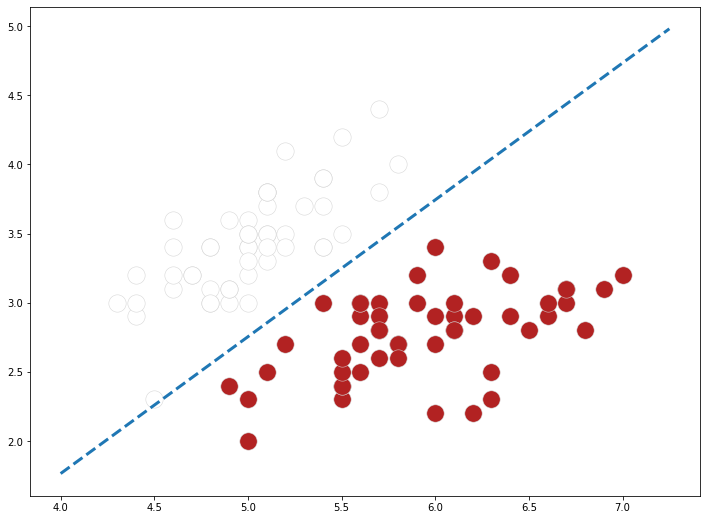

In [0]:
fig, ax = plt.subplots(figsize=(12, 9))

# iris setosa(y=0)のデータを抽出
setosa = first_two_features[teacher_labels == 0]
# iris versicolor(y=1)のデータを抽出
versicolor = first_two_features[teacher_labels == 1]

plt.scatter(setosa[:, 0], setosa[:, 1], s=300, c='white', linewidths=0.5, edgecolors='lightgray')
plt.scatter(versicolor[:, 0], versicolor[:, 1], s=300, c='firebrick', linewidths=0.5, edgecolors='lightgray')

# 回帰直線の描画
Xi = np.linspace(4, 7.25)
# 超平面(線)を描画
Y = -model.coef_[0][0] / model.coef_[0][1] * Xi - model.intercept_ / model.coef_[0][1]

# グラフに線描画
ax.plot(Xi, Y, linestyle='dashed', linewidth=3)
plt.show()

### 超平面
* 一般化された平面のこと
 * ３次元の場合、１つの超平面は３次元空間全体を２つの空間に分割する平面のイメージ
 * ２次元の場合、直線となる
* 超平面の次元数は、n-1となる


### 交差検証
* 学習の結果を評価する手法の１つ
 * 具体的には、データセットをモデルの学習に用いられる「訓練データ」と、そのモデルの汎用的な性能を測る「検証データ」に分割する

In [11]:
import sklearn.datasets as datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()

# 例として、3,4番目の特徴量の２次元データを使用
last_two_features = iris.data[:, [2, 3]]
# 教師ラベル
teacher_labels = iris.target

# 訓練データと検証データに分ける
# 今回は、訓練データを８０％、検証データを２０％とする
# 乱数を制御するパラメータ random_stateは、Noneにすると毎回異なるデータを生成する
train_features, test_features, train_teacher_labels, test_teacher_labels = train_test_split(last_two_features, teacher_labels, test_size=0.2, random_state=None)

# データの標準化
sc = StandardScaler()
sc.fit(train_features)

# 標準化された特徴量学習データと検証データ
train_features_std = sc.transform(train_features)
test_features_std = sc.transform(test_features)

# 線形SVNのオブジェクト生成
model = SVC(kernel='linear', random_state=None)
# モデルを学習させる
model.fit(train_features_std, train_teacher_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
from sklearn.metrics import accuracy_score

# 学習済モデルに訓練データを分類させるときの精度
predict_train = model.predict(train_features_std)
# 分類精度を計算して、表示
accuracy_train = accuracy_score(train_teacher_labels, predict_train)
print('訓練データに対する分類精度 : %.2f' % accuracy_train)

訓練データに対する分類精度 : 0.96


In [13]:
# 学習済モデルに検証データを分類させるときの精度
predict_test = model.predict(test_features_std)
accuracy_test = accuracy_score(test_teacher_labels, predict_test)
print('検証データに対する分類精度 : %.2f' % accuracy_test)

検証データに対する分類精度 : 0.97


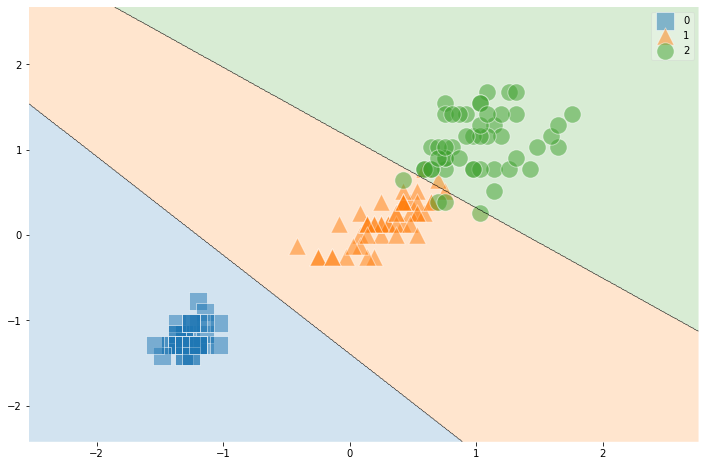

In [16]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions as pdr 
import numpy as np

# 学習と検証用の特徴量データと教師データをそれぞれ結合させる
combined_features_std = np.vstack((train_features_std, test_features_std))
combined_teacher_labels = np.hstack((train_teacher_labels, test_teacher_labels))

fig = plt.figure(figsize=(12, 8))

# 散布図設定
scatter_kwargs = {'s': 300, 'edgecolor': 'white', 'alpha': 0.5}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 200, 'label': 'Test', 'alpha': 0.7}
pdr(combined_features_std, combined_teacher_labels, clf=model, scatter_kwargs=scatter_kwargs, contourf_kwargs=contourf_kwargs, scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.show()